In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sentiment_analysis.csv')

# Display the first few rows of the dataset
print(df.head())


   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


In [19]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


In [41]:
df=df.drop(['Year','Month','Day','Time of Tweet','Platform','sentiment'],axis=1)

In [47]:
sentiment_to_emotion = {
    '1 star': 'Very Sad',
    '2 stars': 'Sad',
    '3 stars': 'Neutral',
    '4 stars': 'Happy',
    '5 stars': 'Very Happy'
}

In [49]:
# Apply sentiment analysis to the text column
df['emotion'] = df['text'].apply(lambda x: sentiment_to_emotion[sentiment_analysis(x)[0]['label']])

# Display the updated dataset with sentiment labels
print(df.head())


                                                text     emotion
0              What a great day!!! Looks like dream.  Very Happy
1     I feel sorry, I miss you here in the sea beach    Very Sad
2                                     Don't angry me  Very Happy
3  We attend in the class just for listening teac...    Very Sad
4                  Those who want to go, let them go    Very Sad


In [51]:
# Save the dataset with sentiments
df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'")


Sentiment analysis results saved to 'sentiment_analysis_results.csv'


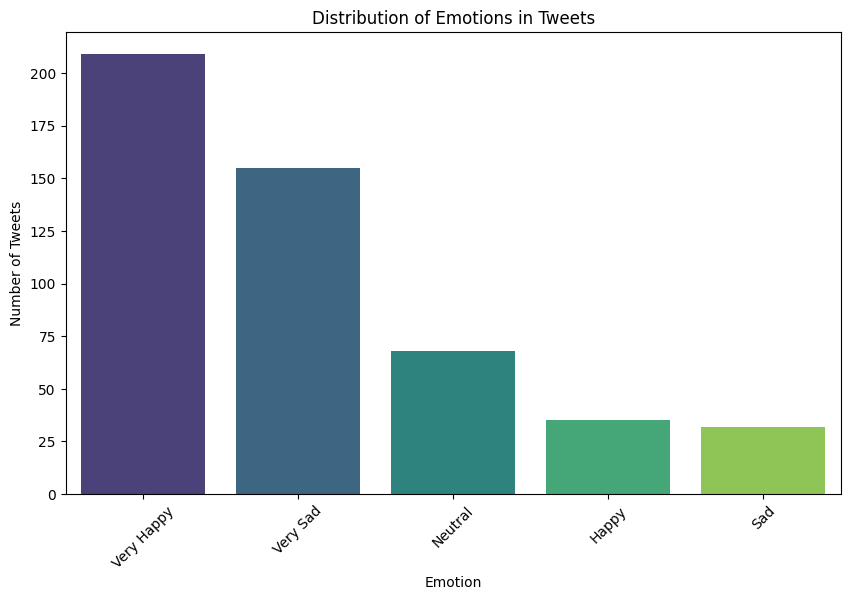

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns 
# Count the number of occurrences of each emotion
emotion_counts = df['emotion'].value_counts()

# Create a bar plot with the updated method
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, hue=emotion_counts.index, dodge=False, palette='viridis', legend=False)
plt.title('Distribution of Emotions in Tweets')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()